Clustering: K-Means Dataset:
Cities_r2.csv
Apply Data pre-processing (Label Encoding , Data Transformation….) techniques
if necessary.
Apply K-Means clustering algorithms (based on total_graduates) to find the group
of customers.

Chit 5 & 7 are same just classification based on differnt columns

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cities_r2.csv to cities_r2.csv


In [ ]:
df=pd.read_csv("cities_r2.csv")
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [ ]:
df.isnull().sum()

,0
name_of_city,0
state_code,0
state_name,0
dist_code,0
population_total,0
population_male,0
population_female,0
0-6_population_total,0
0-6_population_male,0
0-6_population_female,0


In [ ]:
df_cluster=df[['total_graduates','effective_literacy_rate_total']]

In [ ]:
df_cluster=df_cluster.dropna()

In [ ]:
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

In [ ]:
inertia=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_cluster_scaled)
  inertia.append(kmeans.inertia_)

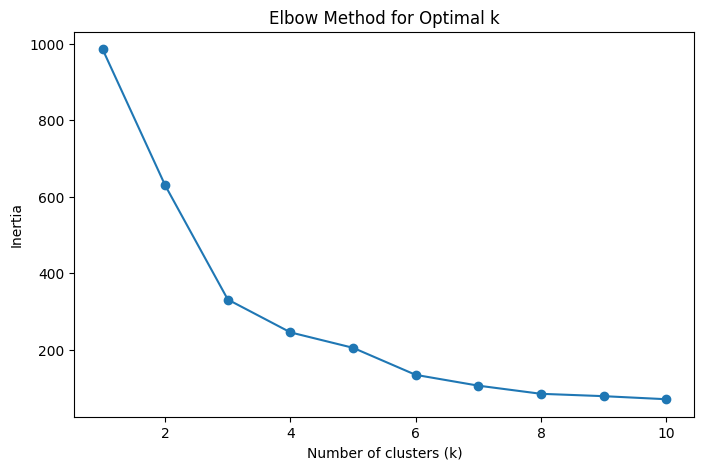

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
optimal_k = 4

In [ ]:
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
df['Cluster']=kmeans.fit_predict(df_cluster_scaled)
df['Cluster'] = df['Cluster'].astype('category')

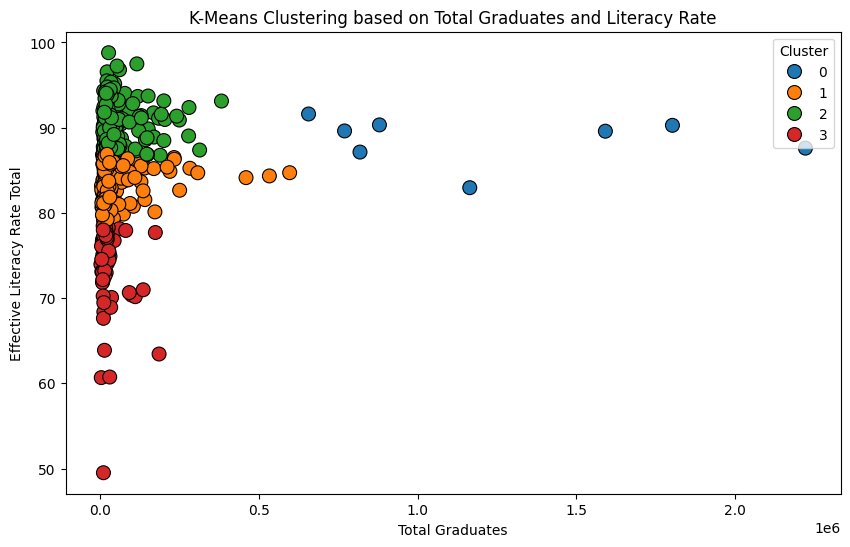

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_graduates', y='effective_literacy_rate_total', hue='Cluster',
                data=df, palette='tab10', s=100, edgecolor='black')
plt.title('K-Means Clustering based on Total Graduates and Literacy Rate')
plt.xlabel('Total Graduates')
plt.ylabel('Effective Literacy Rate Total')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
optimal_k = 3

In [ ]:
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
df['Cluster']=kmeans.fit_predict(df_cluster_scaled)
df['Cluster']=df['Cluster'].astype('category')

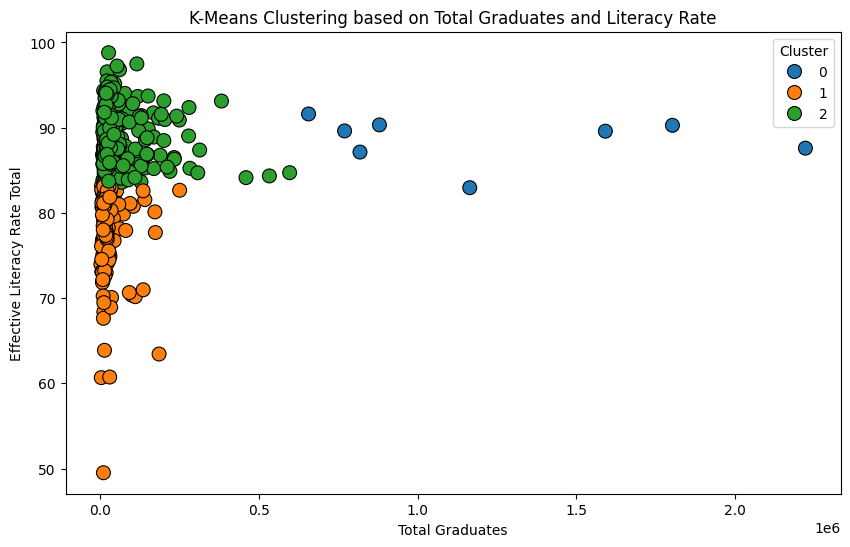

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_graduates', y='effective_literacy_rate_total', hue='Cluster',
                data=df, palette='tab10', s=100, edgecolor='black')
plt.title('K-Means Clustering based on Total Graduates and Literacy Rate')
plt.xlabel('Total Graduates')
plt.ylabel('Effective Literacy Rate Total')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['Cluster_k3'] = kmeans_3.fit_predict(df_cluster_scaled)
df['Cluster_k4'] = kmeans_4.fit_predict(df_cluster_scaled)

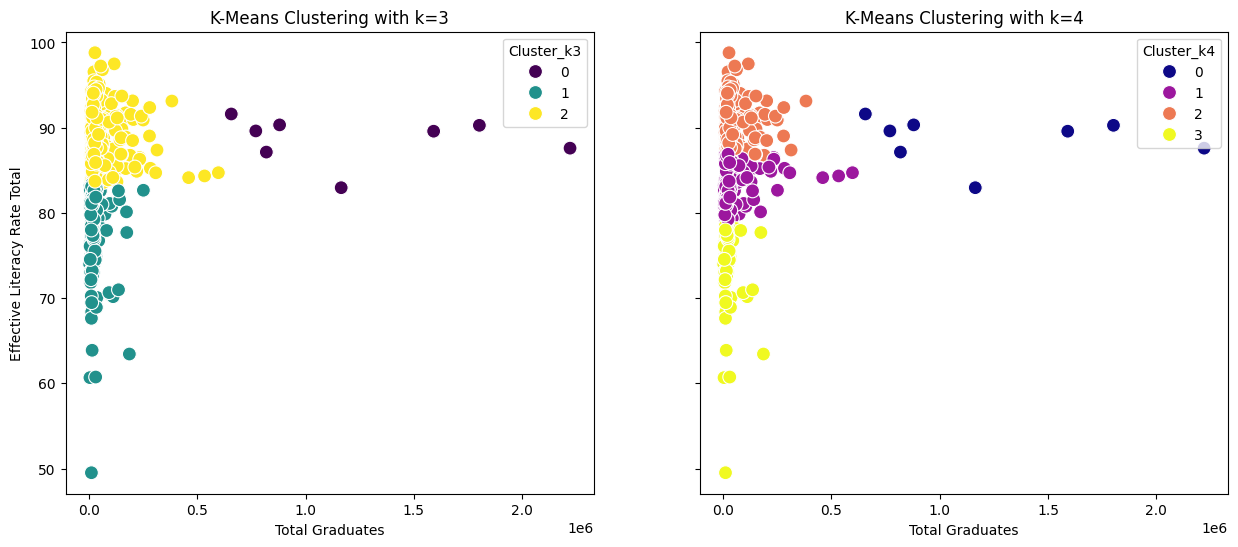

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,6),sharey=True)
sns.scatterplot(ax=axes[0], x='total_graduates', y='effective_literacy_rate_total',
                hue='Cluster_k3', data=df, palette='viridis', s=100)
axes[0].set_title('K-Means Clustering with k=3')
axes[0].set_xlabel('Total Graduates')
axes[0].set_ylabel('Effective Literacy Rate Total')

# Plot for k=4
sns.scatterplot(ax=axes[1], x='total_graduates', y='effective_literacy_rate_total',
                hue='Cluster_k4', data=df, palette='plasma', s=100)
axes[1].set_title('K-Means Clustering with k=4')
axes[1].set_xlabel('Total Graduates')
axes[1].set_ylabel('Effective Literacy Rate Total')

plt.show()